<a href="https://colab.research.google.com/github/Zaicevvv/GoIT-DSandML-Private/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Завантажимо дані.

In [60]:
df_data_2d = pd.read_csv('/content/data_2d.csv')
df_mnist = pd.read_csv('/content/mnist.csv')

df_data_2d.name = 'df_data_2d'
df_mnist.name = 'df_mnist'

print(df_data_2d.head())
print(df_mnist.head())

   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1                       0.0                  -0.201379   
2                       0.0                   0.608496   
3                       0.0                  -0.082282   
4                       0.0                   2.083069   

   4.608603078297135447e-01  
0                  2.366961  
1                  0.470430  
2                  1.225400  
3                  1.137218  
4                  2.694482  
   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661

За допомогою бібліотеки yellowbrick та ліктевого методу знайдемо оптимальну кількість кластерів.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

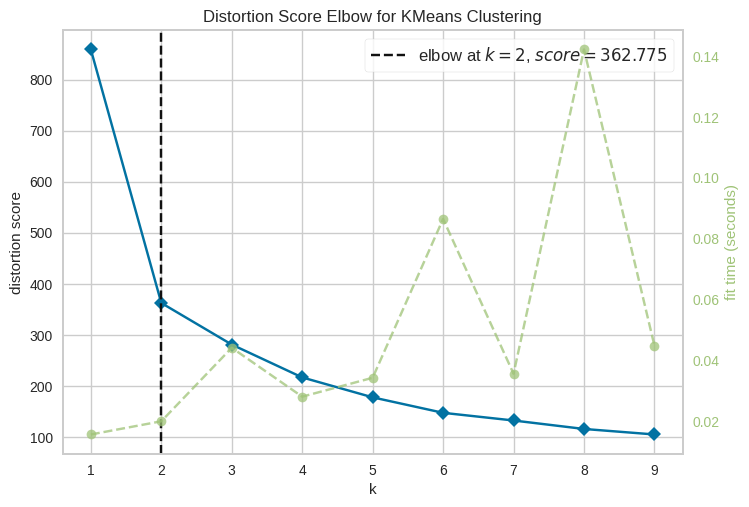

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

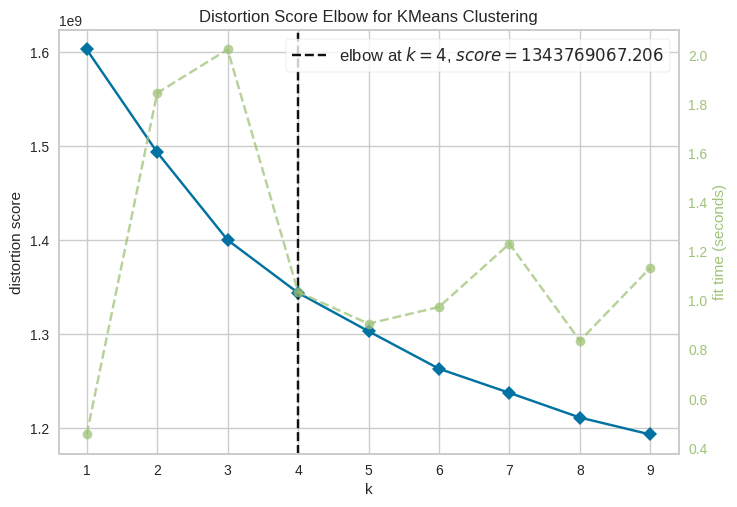

In [61]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

datasets = [df_data_2d, df_mnist]

for dataset in datasets:
  model = KMeans()
  visualizer = KElbowVisualizer(model, k=(1,10))
  visualizer.fit(X=dataset)
  visualizer.show()

Бачимо, що для data_2d оптимальна кількість кластерів - 2, а для mnist - 4.
Використаємо цю знахідку та застосуємо алгоритм K-means для кластеризації.

In [65]:
models = {}
centroids = {}

for dataset, k in zip(datasets, [2, 4]):
  km = KMeans(n_clusters=k).fit(dataset)
  models[dataset.name] = km.predict(dataset)
  centroids[dataset.name] = km.cluster_centers_

print(models)
print(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'df_data_2d': array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32), 'df_mnist': array([2, 1, 3, 0, 1, 0, 0, 0, 0, 3, 3, 0, 3, 1, 2, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 3, 0, 0, 3, 1, 2, 1, 2, 3, 0, 3, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       2, 1, 1, 0, 0, 2, 2, 2, 2, 3, 2, 0, 1, 0, 1, 0, 3, 0, 1, 0, 0, 3,
       0, 2, 3, 0, 3, 3, 1, 1, 0, 2, 0, 1, 0, 0, 3, 3, 0, 0, 0, 0, 2, 3,

Візуалізуємо результат роботи кластеризації. Скористаємось алгоритмом PCA щоб зменшити розмірність наших даних до 2-вимірного варіанту.

df_data_2d
Before PCA
(199, 3)
After PCA
(199, 2)


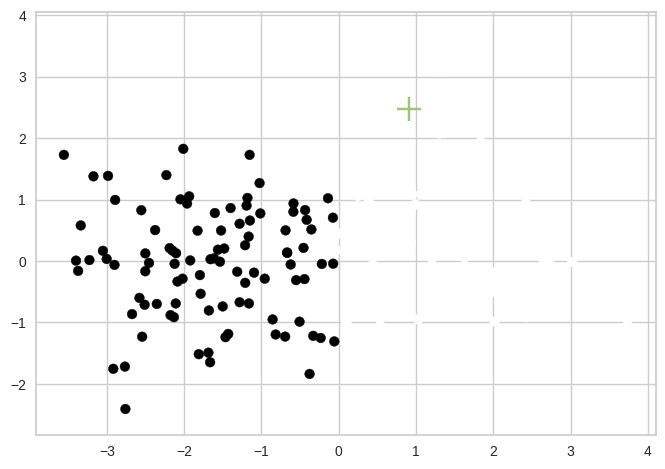

df_mnist
Before PCA
(499, 785)
After PCA
(499, 2)


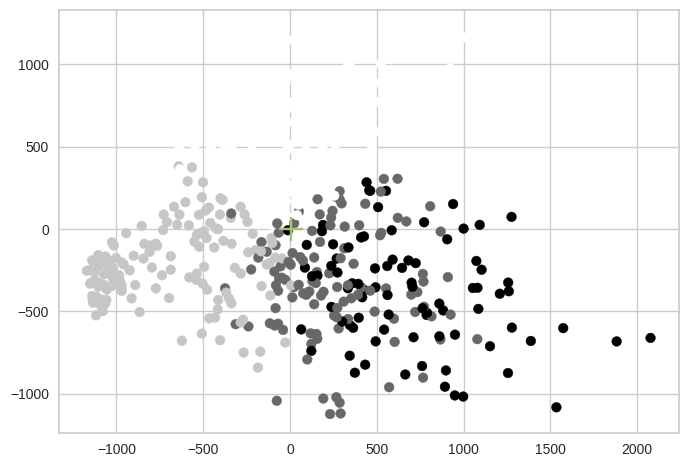

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

for dataset in datasets:
  print(dataset.name)
  print('Before PCA')
  print(dataset.shape)

  pca.fit(dataset)
  dataset_pca = pd.DataFrame(pca.transform(dataset))

  print('After PCA')
  print(dataset_pca.shape)

  plt.scatter(dataset_pca.iloc[:,0], dataset_pca.iloc[:,1], c=models[dataset.name])
  plt.scatter(centroids[dataset.name][0][0], centroids[dataset.name][0][1], marker="+", c='g', s=300)
  plt.show()